In [24]:
#import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from collections import Counter

In [2]:
###<Summary>
### Do it by myself below
###<Summary>
#load data
df = pd.read_csv("./appstore_games.csv")
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [11]:
#find all columns
columns = df.columns

#select type is flaot
df = df.select_dtypes(exclude=['object'])
df.dropna(inplace=True)
print(df.isnull())

          ID  Average User Rating  User Rating Count  Price   Size
0      False                False              False  False  False
1      False                False              False  False  False
2      False                False              False  False  False
3      False                False              False  False  False
4      False                False              False  False  False
...      ...                  ...                ...    ...    ...
16950  False                False              False  False  False
16956  False                False              False  False  False
16962  False                False              False  False  False
16967  False                False              False  False  False
16993  False                False              False  False  False

[7561 rows x 5 columns]


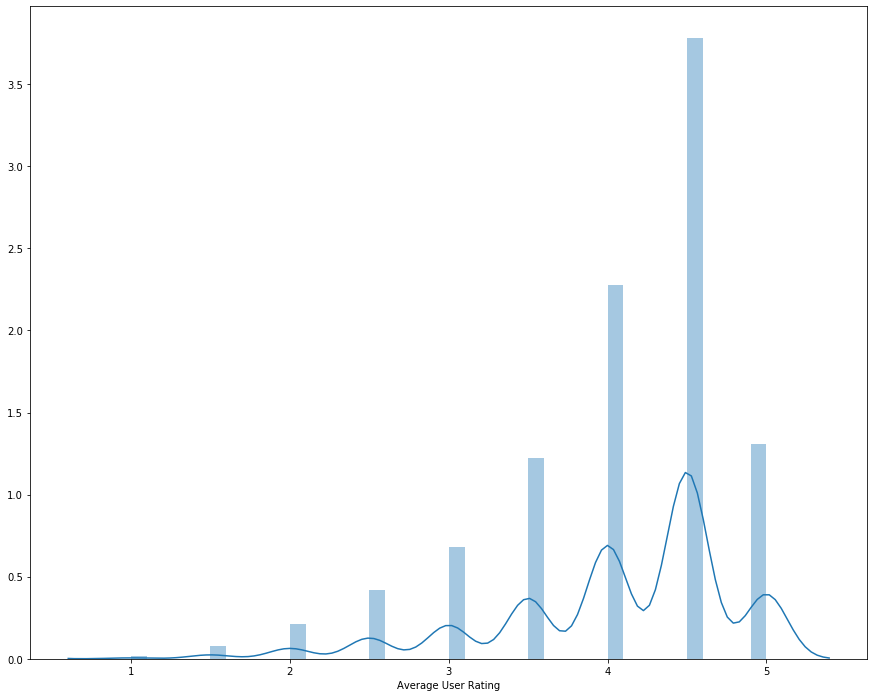

In [4]:
#histgram of Average User Rating
fig, ax = plt.subplots(figsize=(15, 12))
sns.distplot(df["Average User Rating"])

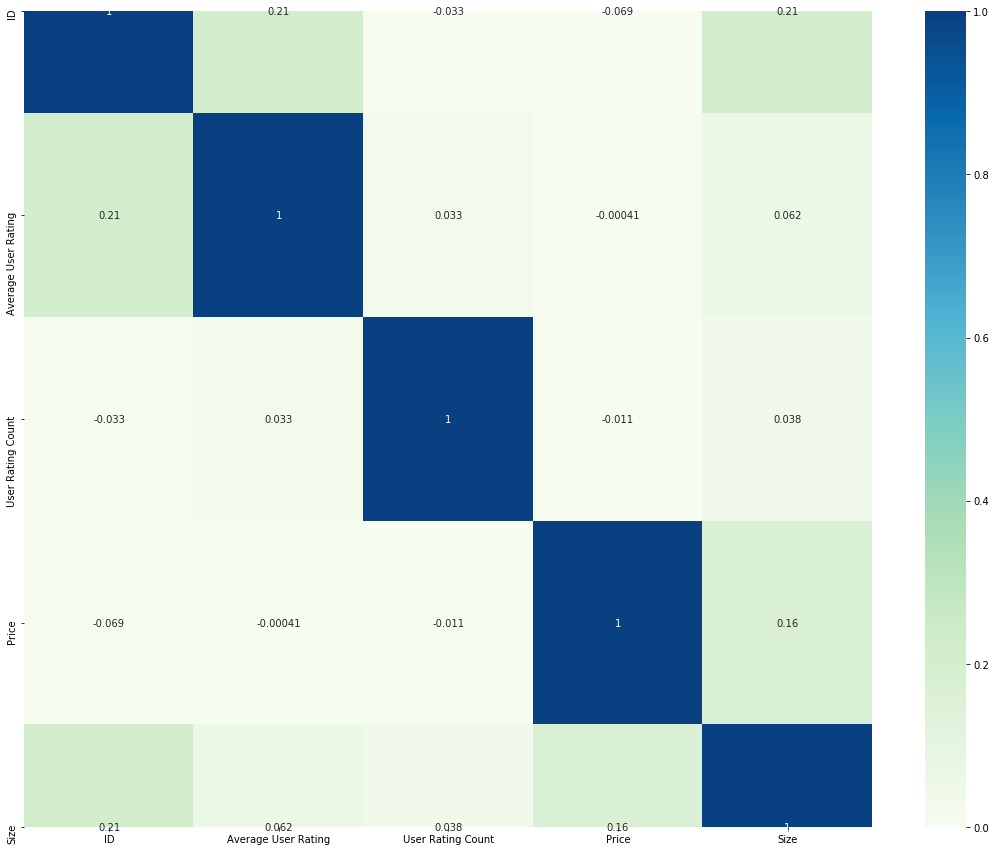

In [5]:
#correlation
corr = df.corr()
fig, ax = plt.subplots(figsize=(19, 15))
sns.heatmap(corr, vmax=1, vmin=0, cmap='GnBu', annot=True)

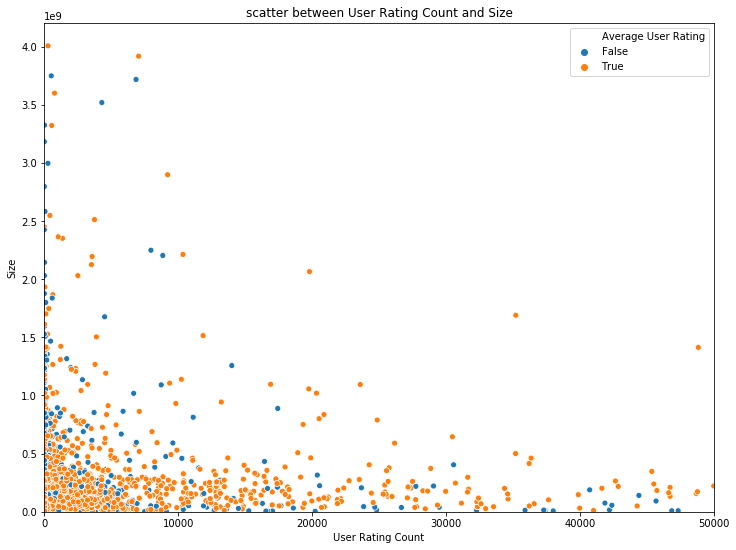

In [6]:
#plot scatter between Average User Rating  and  User Rating Count (corr=0.038)
fig, ax = plt.subplots(figsize=(12, 9))
scatter = sns.scatterplot(x=df['User Rating Count'], y=df['Size'] ,hue = df['Average User Rating']>=4.5)
scatter.set(xlim=(0,50000))
scatter.set(ylim=(0))
plt.title('scatter between User Rating Count and Size')
plt.show()

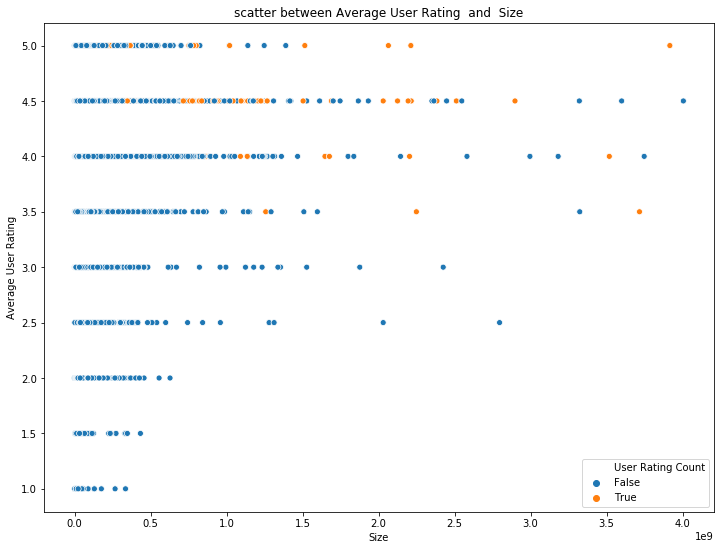

In [7]:
#plot scatter between Average User Rating  and  Size (corr=0.062)
fig, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(x=df['Size'], y=df['Average User Rating'], hue=df['User Rating Count']>2000)
plt.title('scatter between Average User Rating  and  Size')
plt.show()

In [57]:
#Use User Rating Count, Price, Size to predict Average User Rating by KNN
def Distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def Normalize(values):
    values_min = values.min()
    values_max = values.max()
    min_max = lambda x: (x - values_min) / (values_max - values_min) 
    
    return values.apply(min_max)
def PredictAverageUserRaing(input_data, user_rating_count, price, size, n_neighbors=5):
    #normaliztion
    data = input_data.append({"User Rating Count":user_rating_count,
                              "Price": price,
                              "Size": size}, ignore_index=True)
    data["std_urc"] = Normalize(data["User Rating Count"])
    data["std_price"] = Normalize(data['Price'])
    data["std_size"] = Normalize(data["Size"])
    std_user_rating_count = data["std_urc"].iloc[-1]
    std_price = data["std_price"].iloc[-1]
    std_size = data["std_size"].iloc[-1]
    data.drop(index=data.tail(1).index, inplace=True)

    #Distance to everypoint
    data["distance"] = data.apply(lambda x:Distance(x[["std_urc", "std_price", "std_size"]], \
                                                    np.array([std_user_rating_count, std_price, std_size])),axis=1)
    # Get number of k colse point
    kpoints = data.loc[data.distance.nsmallest(n_neighbors).index]
    print(kpoints)
    # find number of the Average User Rating appeard the most
    average_user_rating = Counter(kpoints["Average User Rating"]).most_common(1)[0][0]
    
    # Mean
    data = data[data["Average User Rating"]==average_user_rating]
    average_user_rating = data["Average User Rating"].median()
    
    
    return average_user_rating

In [56]:
PredictAverageUserRaing(df, df.iloc[0]["User Rating Count"], df.iloc[0]["Price"], df.iloc[0]["Size"])

                ID  Average User Rating  User Rating Count  Price         Size
0     2.849214e+08                  4.0             3553.0   2.99   15853568.0
1     2.849264e+08                  3.5              284.0   1.99   12328960.0
2     2.849466e+08                  3.0             8376.0   0.00     674816.0
3     2.857555e+08                  3.5           190394.0   0.00   21552128.0
4     2.858312e+08                  3.5               28.0   2.99   34689024.0
...            ...                  ...                ...    ...          ...
7557  1.473182e+09                  5.0               30.0   0.00   79646720.0
7558  1.473560e+09                  5.0               51.0   0.00  125348864.0
7559  1.473681e+09                  5.0                5.0   0.00  128687104.0
7560  1.474461e+09                  5.0               33.0   0.00    8845312.0
7561           NaN                  NaN             3553.0   2.99   15853568.0

[7562 rows x 5 columns]
              ID  Average U

4.0